## Импортирование файла, получение его характеристик

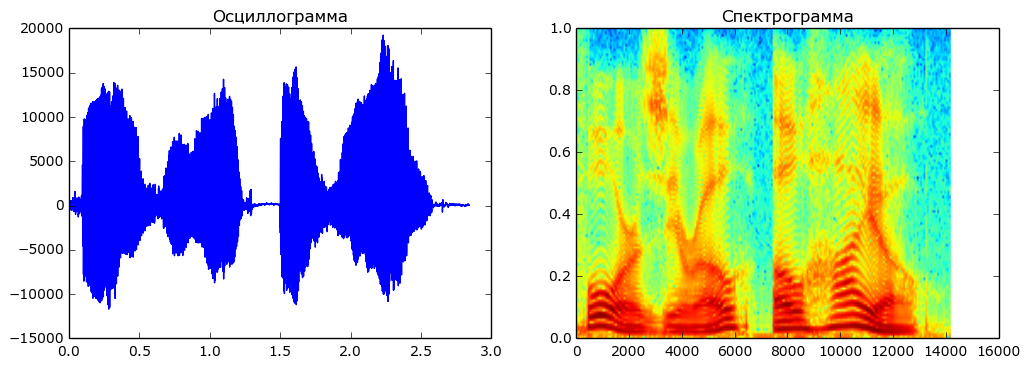

In [52]:
## /usr/bin/env python3
import IPython
import numpy as np
import wave
import sys
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.signal import lfilter, firwin
from IPython.core.display import Image, display

WINDOW = 50
FORMANTS = 9
STEP = 5
OFFSET = 2
AUDIO_FILE = 'FOURZERO.WAV'
spf = wave.open(AUDIO_FILE,'r')
#Extract Raw Audio from Wav File
signal = spf.readframes(-1)
signal = np.fromstring(signal, 'Int16')
fs = spf.getframerate()
#If Stereo
if spf.getnchannels() == 2:
    print('Just mono files')
    sys.exit(0)


Time=np.linspace(0, len(signal)/fs, num=len(signal))
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,4))

ax1.set_title(u'Осциллограмма')
ax1.plot(Time,signal)
ax2.set_title(u'Спектрограмма')
ax2.specgram(signal)

IPython.display.Audio(AUDIO_FILE)


## Нормирование и фильтрация сигнала

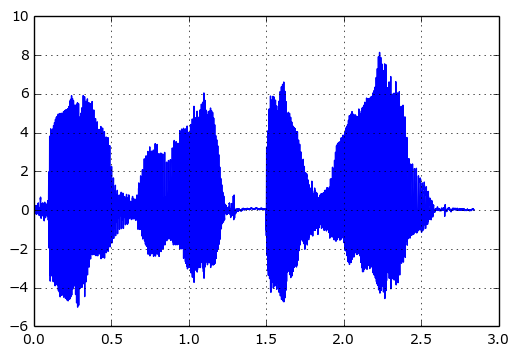

In [53]:
#Нормирование сигнала
signal_new = abs(signal)
average = sum(signal_new)/signal.size
signal = signal/average

# The Nyquist rate of the signal.
nyq_rate = fs / 2.
 
# The cutoff frequency of the filter: 6KHz
cutoff_hz = 4000.0
 
# Length of the filter (number of coefficients, i.e. the filter order + 1)
numtaps = 5
 
# Use firwin to create a lowpass FIR filter
fir_coeff = firwin(numtaps, cutoff_hz/nyq_rate)
 
# Use lfilter to filter the signal with the FIR filter
#filtered_signal = lfilter(fir_coeff, 1.0, signal)
signal = lfilter(fir_coeff, 1.0, signal)

#------------------------------------------------
# Plot the original and filtered signals.
#------------------------------------------------
 
# The first N-1 samples are "corrupted" by the initial conditions
warmup = numtaps - 1
 
# The phase delay of the filtered signal
delay = (warmup / 2) / fs
 
plt.figure(1)
# Plot the original signal
plt.plot(Time, signal)
 
# Plot the filtered signal, shifted to compensate for the phase delay
#plt.plot(Time-delay, filtered_signal, 'r-')
 
# Plot just the "good" part of the filtered signal.  The first N-1
# samples are "corrupted" by the initial conditions.
#plt.plot(Time[warmup:]-delay, filtered_signal[warmup:], 'g', linewidth=4)
 
plt.grid(True)
 
plt.show()

## Вычисление автокорреляционной функции

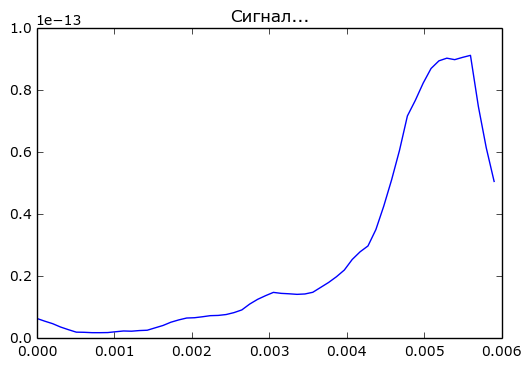

In [54]:
#Организация циклов для вычисления значений функции D
#length = signal.size-(WINDOW + FORMANTS + (FORMANTS-1) * OFFSET)-1

#Подсчет автокорреляционной матрицы для каждого отсчета.
values = []
limit = signal.size - (WINDOW + FORMANTS)
for s in range(len(signal)- limit):
	vectors = []
	for i in range(FORMANTS):
		vectors.append(signal[s+i:s+i+WINDOW])
	autocorr_matrix = np.zeros((FORMANTS, FORMANTS))
	for i in range(FORMANTS):
		for j in range(FORMANTS):
			autocorr_matrix[i][j] = np.dot(vectors[i], vectors[j])
	determinant = np.linalg.det(autocorr_matrix)
	values.append(determinant)


Time=np.linspace(0, len(values)/fs, num=len(values))

plt.figure(1)
plt.title(u'Сигнал...')
plt.plot(Time,values)
plt.show()

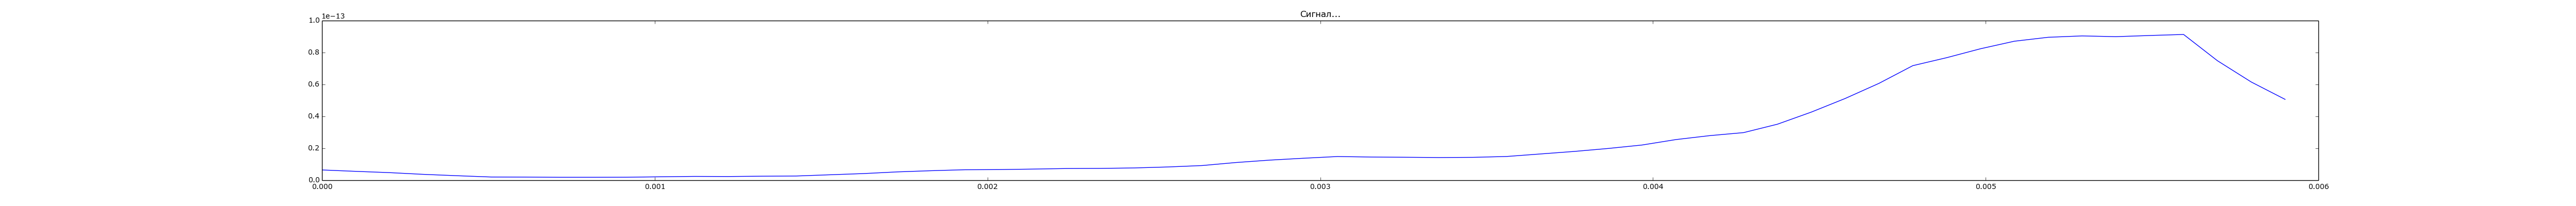

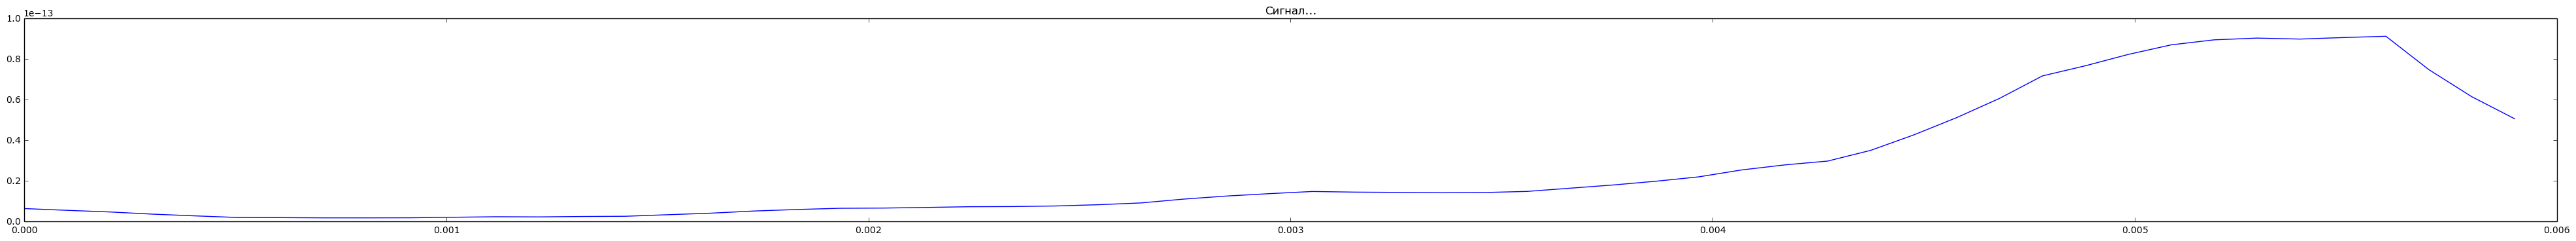

In [55]:
plt.figure(num=None, figsize=(50, 4), dpi=100, facecolor='w', edgecolor='k')
plt.title(u'Сигнал...')
plt.plot(Time,values)
plt.savefig('1.png')
display(Image('1.png', width=8000, unconfined=True))